# Setup
Import TensorFlow and other necessary libraries:

In [63]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [64]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL 
import seaborn as sns

# Import and explore the dataset

dataset of about 3,700 photos of flowers. The dataset contains two sub-directories, one per class:

''' flower_photo/ 
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/ '''

In [65]:
import pathlib

# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path('./Flower Dataset').with_suffix('')
data_dir

WindowsPath('Flower Dataset')

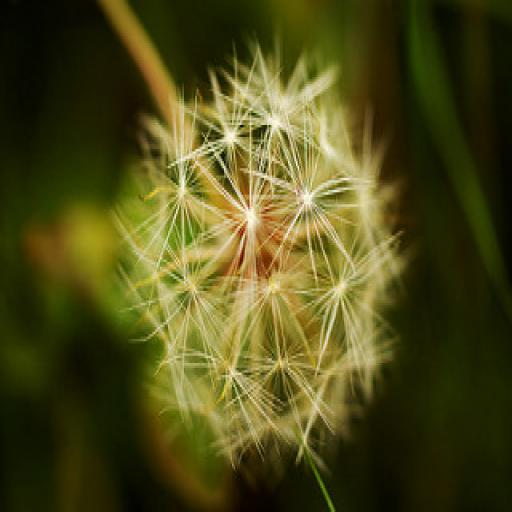

In [66]:
dandelion = list(data_dir.glob('dandelion/*'))
PIL.Image.open(str(dandelion[0]))

# Create a dataset

In [67]:
batch_size = 32
img_height = 224
img_width = 224

In [68]:
flower_classes = { 'daisy':0 , 'dandelion':1}
X,y = [] , []

for flower in flower_classes:
    for path in list(data_dir.glob(flower+'/*')):
        img = cv2.imread(str(path))
        resized_img = cv2.resize(img  , (img_width , img_height) )
        X.append(resized_img)
        y.append(flower_classes[flower]) 
        
X = np.array(X)
y = np.array(y)
X[0] , y[0]

(array([[[130, 135, 135],
         [136, 141, 140],
         [142, 146, 145],
         ...,
         [151, 153, 153],
         [153, 155, 155],
         [148, 150, 150]],
 
        [[129, 135, 134],
         [136, 141, 140],
         [141, 145, 144],
         ...,
         [151, 153, 153],
         [152, 154, 154],
         [146, 148, 148]],
 
        [[128, 134, 133],
         [135, 140, 139],
         [139, 144, 143],
         ...,
         [151, 153, 153],
         [151, 153, 153],
         [145, 147, 147]],
 
        ...,
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [124, 125, 129],
         [124, 125, 129],
         [124, 125, 129]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [125, 126, 130],
         [125, 126, 130],
         [125, 126, 130]],
 
        [[ 26,  47,  44],
         [ 26,  47,  44],
         [ 26,  47,  44],
         ...,
         [126, 127, 131],
  

In [69]:
X.shape , y.shape

((1821, 224, 224, 3), (1821,))

In [70]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state = 15 , stratify  = y , test_size=0.3 )

In [71]:
X_train.shape , X_test.shape

((1274, 224, 224, 3), (547, 224, 224, 3))

<h1 style='color:yellow'> Build Model without Pre-trained Model </h1>

In [72]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.1),
  ]
)

In [73]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(30, name='last-hidden' ,  activation='relu'),
  layers.Dense(2, name="outputs" , activation = 'sigmoid')
])

In [74]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [75]:
epochs = 1
model_result = model.fit(X_train , y_train , epochs = epochs ,  batch_size=32, validation_data=(X_test, y_test))


c:\Users\vk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 [==============================] - 81s 2s/step - loss: 1.3617 - accuracy: 0.5330 - val_loss: 0.6669 - val_accuracy: 0.6069


In [76]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred_score = model.predict(X_test)
y_score = [ tf.nn.softmax(y) for y in y_pred_score ]
y_pred = [ np.argmax(y) for y in y_score ]

print(y_pred_score[:2] )
print(y_score[:2])
print(y_pred[:2])

18/18 [==============================] - 8s 403ms/step
[[0.4393683  0.5510807 ]
 [0.51881826 0.3095943 ]]
[<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.4721009, 0.5278991], dtype=float32)>, <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.55211604, 0.44788402], dtype=float32)>]
[1, 0]


              precision    recall  f1-score   support

           0       0.53      0.68      0.60       231
           1       0.70      0.55      0.62       316

    accuracy                           0.61       547
   macro avg       0.62      0.62      0.61       547
weighted avg       0.63      0.61      0.61       547



<Axes: >

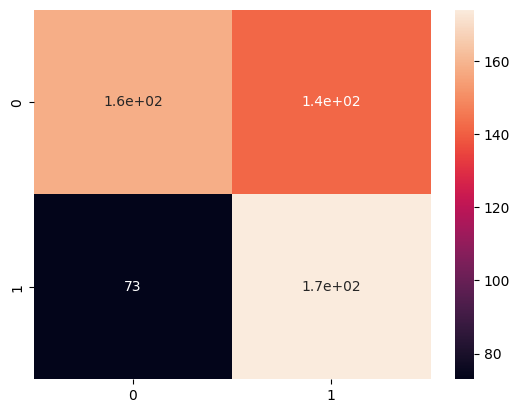

In [77]:

print(classification_report(y_test , y_pred))
sns.heatmap(confusion_matrix( y_pred , y_test ) , annot=True)


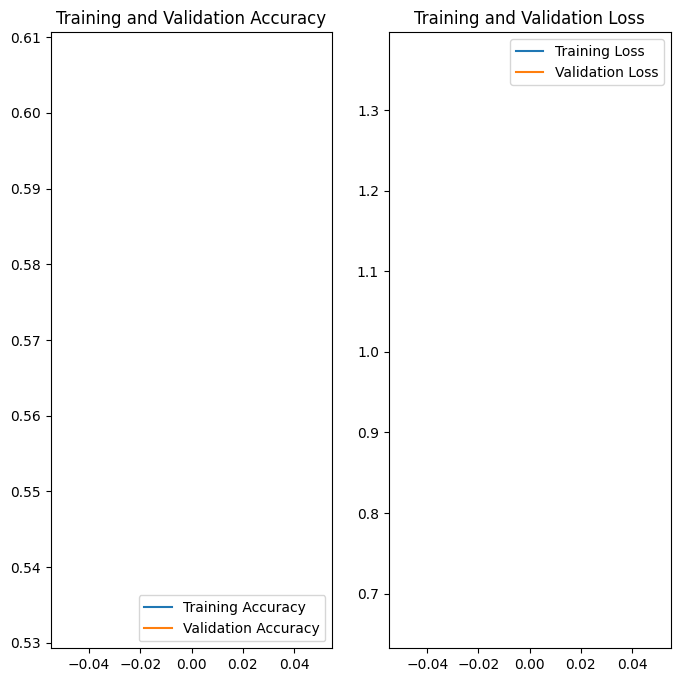

In [80]:
acc = model_result.history['accuracy']
val_acc = model_result.history['val_accuracy']

loss = model_result.history['loss']
val_loss = model_result.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h1 style='color:yellow'> Build with Pre-Trained  Transefer Learning Model </h1>

In [81]:
import tensorflow_hub as hub

In [82]:
IMAGE_SHAPE = (224, 224 )

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [83]:
data_dir = pathlib.Path('./Fish Dataset').with_suffix('')
test_img_dirs = list(map( lambda path : str(path) , data_dir.glob('*')))
test_img_dirs[:2]

['Fish Dataset\\1310fe4e17cf523eec5e95cf85913adc.jpg',
 'Fish Dataset\\145401b0f8-450.jpg']

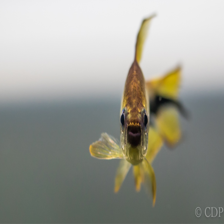

In [84]:
PIL.Image.open(test_img_dirs[0]).resize((224 , 224 ))


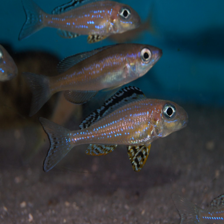

In [85]:
PIL.Image.open(test_img_dirs[11]).resize((224 , 224))

In [86]:
fish_test_imgs = []
for dir in test_img_dirs:
    img = PIL.Image.open(dir).resize(IMAGE_SHAPE)
    img = np.array(img) / 255
    # print(img.shape , img[np.newaxis , ...].shape)
    fish_test_imgs.append(img[np.newaxis , ...])

In [87]:
result = classifier.predict( fish_test_imgs[11] )
pred = np.argmax(tf.nn.softmax(result))
pred

1/1 [==============================] - 2s 2s/step


2

In [ ]:
result.shape

(1, 1001)

In [88]:
with open('FishLabels.txt' , 'r') as f:
    fish_labels =  f.read().splitlines()
fish_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [89]:
fish_labels[pred]

'goldfish'

# Now take pre-trained model and retrain it using flowers images

In [90]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [94]:
num_of_flowers = 2

TL_model = tf.keras.Sequential([
  layers.Rescaling(1./255),
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])


In [95]:
TL_model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

In [102]:
epochs = 5
model_result = TL_model.fit(X_train , y_train , epochs = 2 , batch_size=32, validation_data=(X_test, y_test))



Epoch 1/2
40/40 [==============================] - 84s 2s/step - loss: 0.1151 - acc: 0.9545 - val_loss: 0.1853 - val_acc: 0.9232
Epoch 2/2
40/40 [==============================] - 85s 2s/step - loss: 0.0997 - acc: 0.9678 - val_loss: 0.1928 - val_acc: 0.9177


In [103]:
TL_model.evaluate(X_test,y_test)

18/18 [==============================] - 22s 1s/step - loss: 0.1928 - acc: 0.9177


[0.19279392063617706, 0.9177330732345581]

18/18 [==============================] - 22s 1s/step
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       231
           1       0.91      0.96      0.93       316

    accuracy                           0.92       547
   macro avg       0.92      0.91      0.91       547
weighted avg       0.92      0.92      0.92       547



<Axes: >

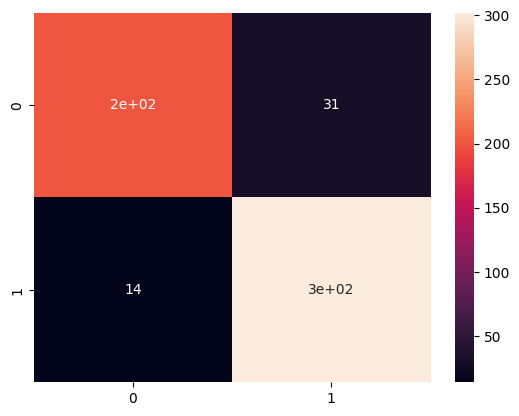

In [104]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred_score = TL_model.predict(X_test)
y_score = [ tf.nn.softmax(y) for y in y_pred_score ]
y_pred = [ np.argmax(y) for y in y_score ]


print(classification_report(y_test , y_pred))
sns.heatmap(confusion_matrix( y_test , y_pred ) , annot=True)


In [105]:
model_result.history

{'loss': [0.11507366597652435, 0.09972403943538666],
 'acc': [0.9544740915298462, 0.9678179025650024],
 'val_loss': [0.18534377217292786, 0.19279392063617706],
 'val_acc': [0.9232175350189209, 0.9177330732345581]}

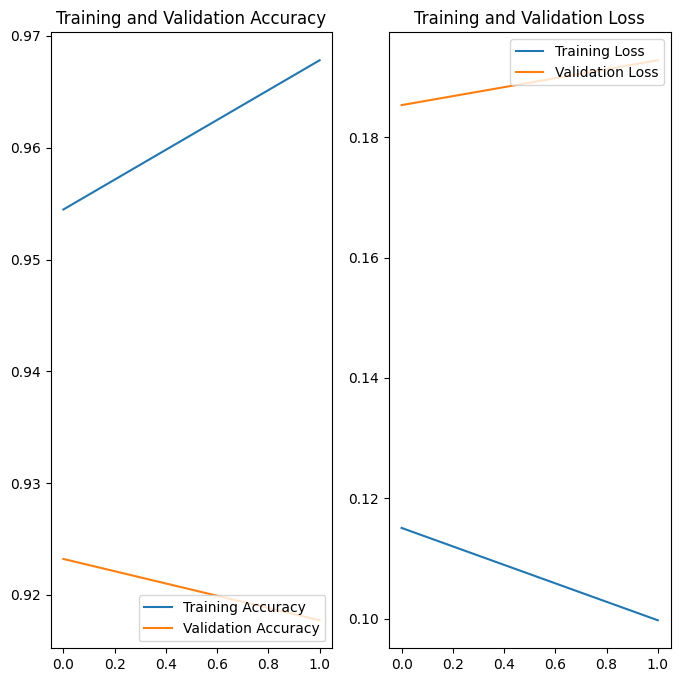

In [107]:
acc = model_result.history['acc']
val_acc = model_result.history['val_acc']

loss = model_result.history['loss']
val_loss = model_result.history['val_loss']

epochs_range = range(2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()